<a href="https://colab.research.google.com/github/FranItu/CODOJOTRACK1/blob/main/BELTEXAM3/BELT_EXAM_3_Francisco_Iturralde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen 2: Evaluación de Pacientes

Tarea:
*  Limpiar el conjunto de datos

*  Crear al menos 2 tipos de visualizaciones distintas para comprender mejor el conjunto de datos

*  Manejar las variables categóricas para prepararte para el aprendizaje automático

*  Determinar qué características incluir en tu modelo o cómo preparar mejor el modelo para el aprendizaje automático.

*  Construir un modelo(s) de aprendizaje automático para predecir fraudes (`Class`). Si construyes más de uno, debes elegir qué modelo utilizar como modelo final.

*  Debes generar predicciones en un conjunto de datos de prueba retenido utilizando el modelo que construiste y calcular la precisión de prueba (o validación cruzada). Se te puntuará según la precisión de tu modelo en tu conjunto de prueba.

## Drive Mount and Library Importation

In [58]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
### Standard Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
### Scaling, metrics, kmeans, dist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [61]:
### Database import
df = pd.read_csv('/content/drive/My Drive/Coding_Dojo/BELT EXAMS/BELTEXAM3/creditcard.csv')

## Database Cleaning

In [62]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [63]:
for col in df:
  print(col, df[col].unique())

Time [0.00000e+00 1.00000e+00 2.00000e+00 ... 1.72787e+05 1.72788e+05
 1.72792e+05]
V1 [-1.35980713  1.19185711 -1.35835406 ...  1.91956501 -0.24044005
 -0.53341252]
V2 [-0.07278117  0.26615071 -1.34016307 ... -0.30125385  0.53048251
 -0.18973334]
V3 [ 2.53634674  0.16648011  1.77320934 ... -3.24963981  0.70251023
  0.70333737]
V4 [ 1.37815522  0.44815408  0.37977959 ... -0.55782812  0.68979917
 -0.50627124]
V5 [-0.33832077  0.06001765 -0.50319813 ...  2.63051512 -0.37796113
 -0.01254568]
V6 [ 0.46238778 -0.08236081  1.80049938 ...  3.0312601   0.62370772
 -0.64961669]
V7 [ 0.23959855 -0.07880298  0.79146096 ... -0.29682653 -0.68617999
  1.57700625]
V8 [ 0.0986979   0.08510165  0.24767579 ...  0.70841718  0.67914546
 -0.41465041]
V9 [ 0.36378697 -0.25542513 -1.51465432 ...  0.43245405  0.39208671
  0.48617951]
V10 [ 0.09079417 -0.16697441  0.20764287 ... -0.48478176 -0.39912565
 -0.91542665]
V11 [-0.55159953  1.61272666  0.62450146 ...  0.41161374 -1.93384882
 -1.04045834]
V12 [-0.6178

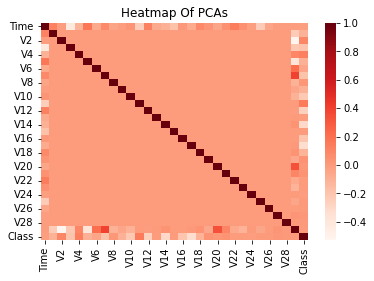

<Figure size 432x288 with 0 Axes>

In [64]:
#PCA heatmap
sns.heatmap(df.corr(), cmap="Reds", annot=False).set(title='Heatmap Of PCAs')
plt.show()
plt.savefig('/content/drive/MyDrive/Coding_Dojo/BELT EXAMS/BELTEXAM3/fig1.png')

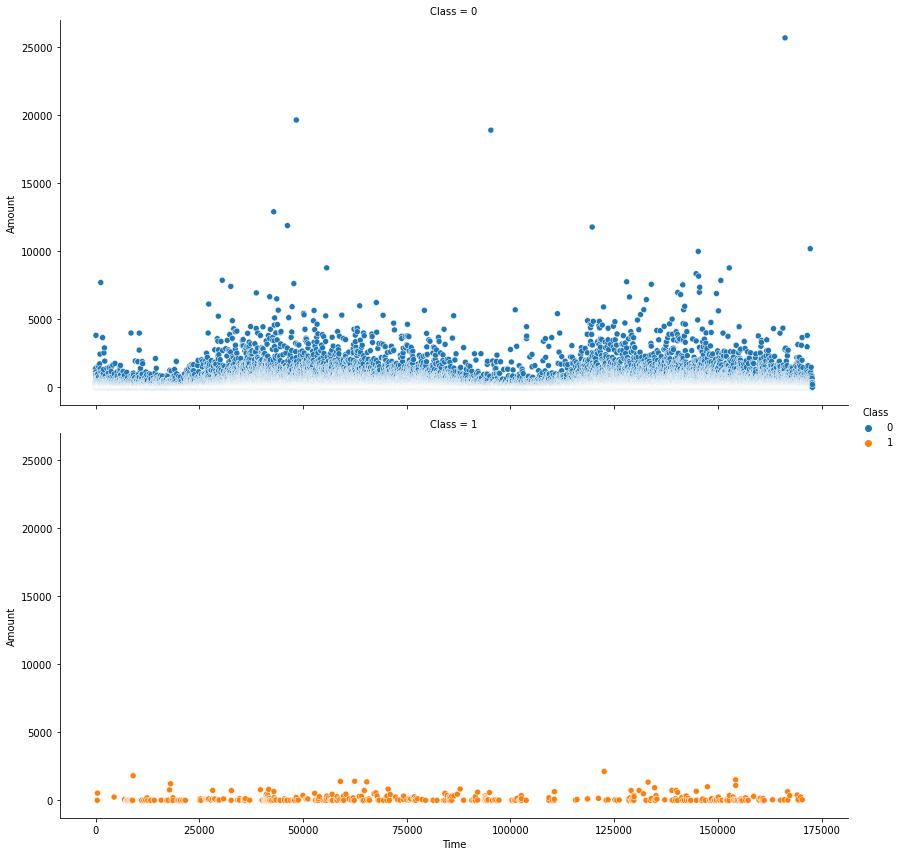

In [65]:
#Ploting time and amount variables filtered by class
sns.relplot(data=df, x="Time", y="Amount", row="Class", hue="Class", 
            kind="scatter", height=6, aspect=2)
plt.savefig('/content/drive/MyDrive/Coding_Dojo/BELT EXAMS/BELTEXAM3/fig2.png')

## Model

In [66]:
### With the previous results, Encoding doesn't seem to be needed

In [67]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [68]:
#X, y, test and train
X = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y = df['Class'].values
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [69]:
#Scaling needed for a logistic regression and addecuate prediction
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [70]:
log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X_train, y_train)
print('Training accuracy:', log_reg.score(X_train, y_train))
print('Test accuracy:', log_reg.score(X_test, y_test))

Training accuracy: 0.9992576392929516
Test accuracy: 0.9991924440855307


In [71]:
#the previous one was overfitted. So a balance in the dataset may be a proper action

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


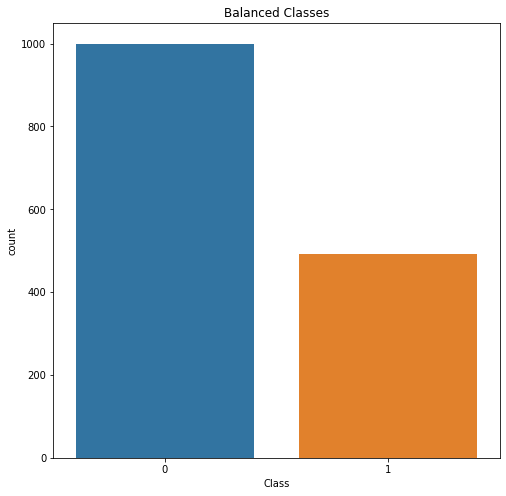

In [91]:
# Resampling para ajustar el balance 
# Source: https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb
# Shuffle the Dataset.
s_df = df[df['Amount'] < 3000 ].sample(frac=1,random_state=4)

# Put all the fraud class in a separate dataset.
crit1 = s_df['Class'] == 1
crit2 = s_df['Amount'] < 3000 
f_df = s_df.loc[crit1 & crit2]

#Randomly select 492 observations from the non-fraud (majority class)
nf_df = s_df.loc[s_df['Class'] == 0].sample(n=1000,random_state=39)

# Concatenate both dataframes again
n_df = pd.concat([f_df, nf_df])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('Class', data=n_df)
plt.title('Balanced Classes')
plt.show()

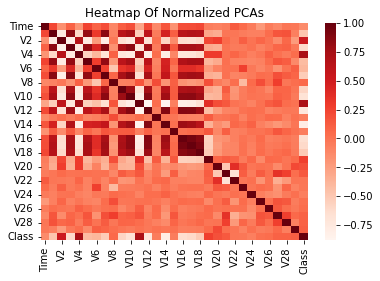

<Figure size 432x288 with 0 Axes>

In [94]:
#Normalized PCA heatmap
sns.heatmap(n_df.corr(), cmap="Reds", annot=False).set(title='Heatmap Of Normalized PCAs')
plt.show()
plt.savefig('/content/drive/MyDrive/Coding_Dojo/BELT EXAMS/BELTEXAM3/fig3.png')

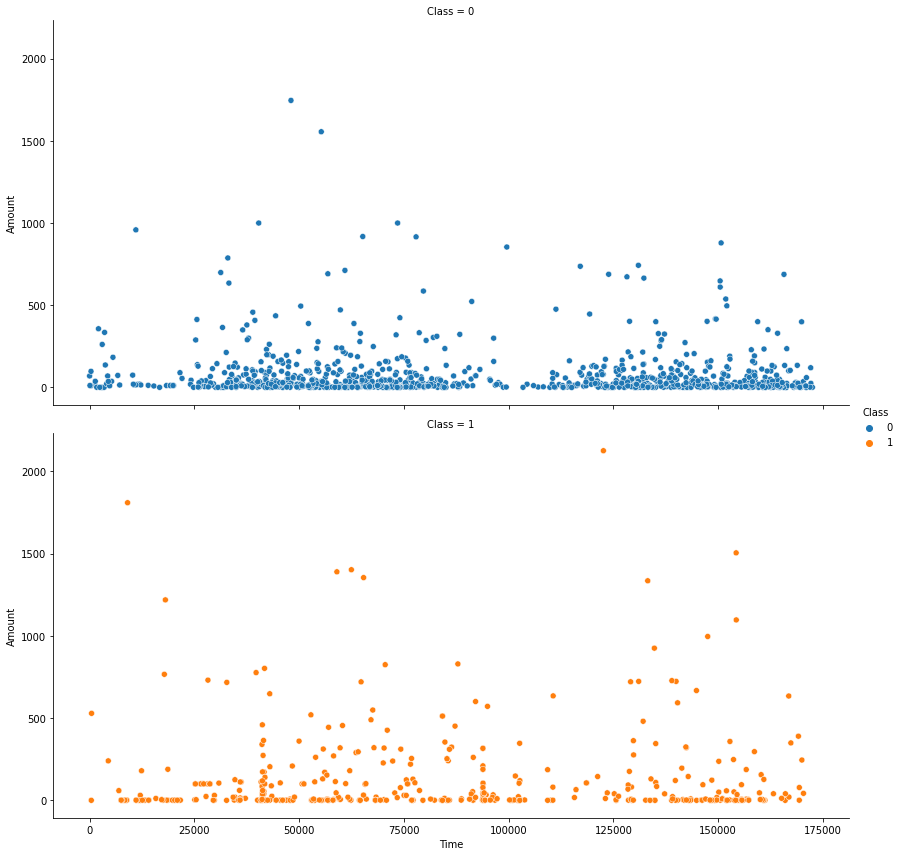

In [95]:
#Normalized Ploting time and amount variables filtered by class
sns.relplot(data=n_df, x="Time", y="Amount", row="Class", hue="Class", 
            kind="scatter", height=6, aspect=2)
plt.savefig('/content/drive/MyDrive/Coding_Dojo/BELT EXAMS/BELTEXAM3/fig4.png')

In [96]:
#X, y, test and train
X2 = n_df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]
y2 = n_df['Class'].values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0, stratify=y2)

In [97]:
#Scaling needed for a logistic regression and addecuate prediction
scaler = StandardScaler()
scaler.fit(X2_train)
X2_train = scaler.transform(X2_train)
X2_test = scaler.transform(X2_test)

In [98]:
log_reg = LogisticRegression(penalty='l1',
                        C=1.0,
                        solver='liblinear',
                        multi_class='ovr')
log_reg.fit(X2_train, y2_train)
print('Training accuracy:', log_reg.score(X2_train, y2_train))
print('Test accuracy:', log_reg.score(X2_test, y2_test))

Training accuracy: 0.9636015325670498
Test accuracy: 0.9508928571428571


In [107]:
#Prep for confusion matrix
data = {'y_Actual':    y2_test,
        'y_Predicted': log_reg.predict(X2_test)
        }

dfx = pd.DataFrame(data, columns=['y_Actual', 'y_Predicted'])
print (dfx)

     y_Actual  y_Predicted
0           1            1
1           0            0
2           0            0
3           1            1
4           0            0
..        ...          ...
443         0            0
444         0            0
445         0            0
446         1            1
447         0            1

[448 rows x 2 columns]


## Conclusiones

La normalizacion ayuda a evitar problemas de overfitting y las predicciones hechas en este escenario son mejores. No es necesario construir un modelo no supervisado, ya que las clases estaban definidas de manera clara.

Esto se ve reflejado adicionalmente en los altos indices de precision que se presentan en la seccion anterior. Para contrastar esto, se presenta la matriz de confusion a continuacion:#source

In [110]:
#source: https://datatofish.com/confusion-matrix-python/
confusion_matrix = pd.crosstab(dfx['y_Actual'], dfx['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print(confusion_matrix)

Predicted    0    1
Actual             
0          294    6
1           16  132


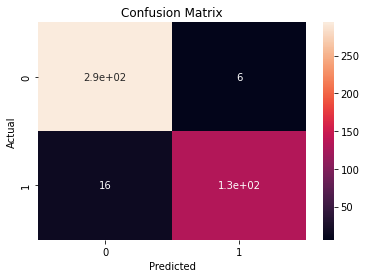

In [113]:
sns.heatmap(confusion_matrix, annot=True).set(title='Confusion Matrix')
plt.show()